In [78]:
import warnings
warnings.filterwarnings('ignore')

import time
from datetime import date, datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [79]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes_transform.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes_transform.csv", index_col='Date', parse_dates=True)

In [80]:
dataset.loc['2024-06-05 10:10:00']

Open                         1308.8
High                         1308.8
Low                          1306.7
Close                        1306.9
Volume                         2893
time_d                   2024-06-05
P                       1296.266667
R1                      1301.333333
R2                      1307.666667
R3                      1312.733333
R4                           1317.8
R5                      1322.866667
R6                      1327.933333
S1                      1289.933333
S2                      1284.866667
S3                      1278.533333
S4                           1272.2
S5                      1265.866667
S6                      1259.533333
First_Open                   1301.4
First_Close                  1304.2
Second_Open                  1304.1
Second_Close                 1304.0
Highest                      1309.5
Lowest                       1295.0
current         2024-06-05 10:15:00
prev_Close                   1308.9
ema_f                   1307

In [81]:
len(dataset)

74012

In [82]:
dataset.tail(3)

,Open,High,Low,Close,Volume,time_d,P,R1,R2,R3,...,ema_l,ema_l_shift,ma_20,price_std,upper_bb,lower_bb,rsi,cross_pivot,ema_cross,ibs
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-19 14:25:00,1317.3,1318.0,1314.3,1314.5,11350,2024-06-19,1313.133333,1317.766667,1327.033333,1331.666667,...,1309.539612,1309.142781,1308.525,6.373950,1321.272900,1295.777100,59.953184,NaN,NaN,0.054054
2024-06-19 14:30:00,1315.1,1315.1,1315.1,1315.1,371,2024-06-19,1313.133333,1317.766667,1327.033333,1331.666667,...,1309.951493,1309.539612,1309.190,6.329039,1321.848078,1296.531922,60.873747,NaN,NaN,1.000000
2024-06-19 14:45:00,1317.0,1317.0,1317.0,1317.0,7116,2024-06-19,1313.133333,1317.766667,1327.033333,1331.666667,...,1310.473605,1309.951493,1309.960,6.293723,1322.547446,1297.372554,63.717975,NaN,NaN,1.000000


In [83]:
data = dataset.copy()

## 2 First candlesticks have same color

In [84]:
same_color = data[((data['First_Close'] > data['First_Open']) & (data['Second_Close'] > data['Second_Open'])) | ((data['First_Close'] < data['First_Open']) & (data['Second_Close'] < data['Second_Open'])) | (data['First_Close'] == data['First_Open']) | (data['Second_Close'] == data['Second_Open'])]
same_color

,Open,High,Low,Close,Volume,time_d,P,R1,R2,R3,...,ema_l,ema_l_shift,ma_20,price_std,upper_bb,lower_bb,rsi,cross_pivot,ema_cross,ibs
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-15 09:00:00,958.0,958.8,958.0,958.7,1028,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,957.953408,957.893681,958.365,2.220781,962.806562,953.923438,54.984480,NaN,NaN,0.875000
2018-08-15 09:05:00,958.6,959.4,958.6,959.3,656,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,958.053156,957.953408,958.640,1.949737,962.539474,954.740526,57.992220,NaN,NaN,0.875000
2018-08-15 09:10:00,959.3,960.5,959.3,960.4,927,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,958.226996,958.053156,958.910,1.786175,962.482350,955.337650,62.887966,NaN,NaN,0.916667
2018-08-15 09:15:00,960.3,961.1,960.3,960.7,1413,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,958.410182,958.226996,959.135,1.708577,962.552155,955.717845,64.116254,NaN,NaN,0.500000
2018-08-15 09:20:00,960.8,960.8,960.1,960.3,1172,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,958.550168,958.410182,959.355,1.545613,962.446227,956.263773,61.207458,NaN,NaN,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-19 14:15:00,1320.6,1325.0,1319.0,1322.7,15368,2024-06-19,1313.133333,1317.766667,1327.033333,1331.666667,...,1308.514204,1307.379340,1307.045,6.221142,1319.487284,1294.602716,83.705062,NaN,NaN,0.616667
2024-06-19 14:20:00,1322.6,1323.0,1317.0,1317.0,12067,2024-06-19,1313.133333,1317.766667,1327.033333,1331.666667,...,1309.142781,1308.514204,1307.845,6.428184,1320.701368,1294.988632,65.957350,cross_down,NaN,0.000000
2024-06-19 14:25:00,1317.3,1318.0,1314.3,1314.5,11350,2024-06-19,1313.133333,1317.766667,1327.033333,1331.666667,...,1309.539612,1309.142781,1308.525,6.373950,1321.272900,1295.777100,59.953184,NaN,NaN,0.054054


In [85]:
same_color['return'] = ''
for i, row in same_color.iterrows():
    if row['cross_pivot'] == 'cross_up':
        # Long signal
        current_date = row.name.strftime('%Y-%m-%d ').format()
        current_time = row.name
        entry_price = row['Close']
        data_to_end_day = same_color[(same_color.index > current_time) & (same_color.index < current_date+' 14:30:00')]
        max_price = 0
        for k, wrow in data_to_end_day.iterrows():
            if wrow['Close'] < entry_price and wrow['Close'] < entry_price - 3.5:
                momentum = -3.5
                break
            else:
                if max_price < wrow['High']:
                    max_price = wrow['High']
                if wrow['Close'] < max_price - 4:
                    momentum = wrow['Close'] - entry_price
                    break
                else:
                    momentum = wrow['Close'] - entry_price
        same_color.at[i, 'return'] = momentum
    elif row['cross_pivot'] == 'cross_down':
        # Short signal
        current_date = row.name.strftime('%Y-%m-%d ').format()
        current_time = row.name
        entry_price = row['Close']
        data_to_end_day = same_color[(same_color.index > current_time) & (same_color.index < current_date+' 14:30:00')]
        min_price = 10000
        for k, wrow in data_to_end_day.iterrows():
            if wrow['Close'] > entry_price and wrow['Close'] > entry_price + 3.5:
                momentum = -3.5
                break
            else:
                if min_price > wrow['Low']:
                    min_price = wrow['Low']
                if wrow['Close'] > min_price + 6:
                    momentum = entry_price - wrow['Close']
                    break
                else:
                    momentum = entry_price - wrow['Close']
        same_color.at[i, 'return'] = momentum

In [86]:
same_color

,Open,High,Low,Close,Volume,time_d,P,R1,R2,R3,...,ema_l_shift,ma_20,price_std,upper_bb,lower_bb,rsi,cross_pivot,ema_cross,ibs,return
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-15 09:00:00,958.0,958.8,958.0,958.7,1028,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,957.893681,958.365,2.220781,962.806562,953.923438,54.984480,NaN,NaN,0.875000,
2018-08-15 09:05:00,958.6,959.4,958.6,959.3,656,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,957.953408,958.640,1.949737,962.539474,954.740526,57.992220,NaN,NaN,0.875000,
2018-08-15 09:10:00,959.3,960.5,959.3,960.4,927,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,958.053156,958.910,1.786175,962.482350,955.337650,62.887966,NaN,NaN,0.916667,
2018-08-15 09:15:00,960.3,961.1,960.3,960.7,1413,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,958.226996,959.135,1.708577,962.552155,955.717845,64.116254,NaN,NaN,0.500000,
2018-08-15 09:20:00,960.8,960.8,960.1,960.3,1172,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,958.410182,959.355,1.545613,962.446227,956.263773,61.207458,NaN,NaN,0.285714,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-19 14:15:00,1320.6,1325.0,1319.0,1322.7,15368,2024-06-19,1313.133333,1317.766667,1327.033333,1331.666667,...,1307.379340,1307.045,6.221142,1319.487284,1294.602716,83.705062,NaN,NaN,0.616667,
2024-06-19 14:20:00,1322.6,1323.0,1317.0,1317.0,12067,2024-06-19,1313.133333,1317.766667,1327.033333,1331.666667,...,1308.514204,1307.845,6.428184,1320.701368,1294.988632,65.957350,cross_down,NaN,0.000000,2.5
2024-06-19 14:25:00,1317.3,1318.0,1314.3,1314.5,11350,2024-06-19,1313.133333,1317.766667,1327.033333,1331.666667,...,1309.142781,1308.525,6.373950,1321.272900,1295.777100,59.953184,NaN,NaN,0.054054,


In [87]:
same_color.loc['2024-06-04 10:00:00']

Open                         1300.8
High                         1301.0
Low                          1298.6
Close                        1298.8
Volume                         5655
time_d                   2024-06-04
P                            1290.2
R1                           1299.7
R2                           1307.9
R3                           1317.4
R4                           1326.9
R5                           1336.4
R6                           1345.9
S1                           1282.0
S2                           1272.5
S3                           1264.3
S4                           1256.1
S5                           1247.9
S6                           1239.7
First_Open                   1292.6
First_Close                  1293.8
Second_Open                  1293.7
Second_Close                 1294.1
Highest                      1302.6
Lowest                       1291.2
current         2024-06-04 10:05:00
prev_Close                   1300.8
ema_f                   1298

In [88]:
has_return = same_color[same_color['return'] != '']
has_return.tail(10)

,Open,High,Low,Close,Volume,time_d,P,R1,R2,R3,...,ema_l_shift,ma_20,price_std,upper_bb,lower_bb,rsi,cross_pivot,ema_cross,ibs,return
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-12 13:55:00,1311.5,1314.0,1311.5,1313.9,7302,2024-06-12,1306.866667,1313.433333,1321.866667,1328.433333,...,1308.421551,1308.850,2.712253,1314.274506,1303.425494,75.434512,cross_up,NaN,0.960000,14.5
2024-06-12 14:00:00,1314.0,1314.9,1312.6,1312.9,6065,2024-06-12,1306.866667,1313.433333,1321.866667,1328.433333,...,1308.827362,1309.270,2.652923,1314.575846,1303.964154,68.671959,cross_down,NaN,0.130435,-3.5
2024-06-12 14:05:00,1312.9,1314.0,1312.2,1313.8,5451,2024-06-12,1306.866667,1313.433333,1321.866667,1328.433333,...,1309.129039,1309.690,2.672846,1315.035692,1304.344308,71.176427,cross_up,NaN,0.888889,14.6
2024-06-12 14:20:00,1318.8,1327.6,1318.3,1327.6,16069,2024-06-12,1306.866667,1313.433333,1321.866667,1328.433333,...,1310.665977,1311.850,4.959786,1321.769571,1301.930429,88.328277,cross_up,NaN,1.000000,0.8
2024-06-12 14:45:00,1330.7,1330.7,1330.7,1330.7,8308,2024-06-12,1306.866667,1313.433333,1321.866667,1328.433333,...,1314.271356,1315.230,7.470440,1330.170880,1300.289120,90.004994,cross_up,NaN,1.000000,0.8
2024-06-19 10:00:00,1306.7,1306.7,1299.3,1300.7,17674,2024-06-19,1313.133333,1317.766667,1327.033333,1331.666667,...,1311.579270,1310.425,3.576219,1317.577438,1303.272562,21.613517,cross_down,NaN,0.189189,-3.5
2024-06-19 13:15:00,1303.1,1305.4,1302.8,1304.9,8311,2024-06-19,1313.133333,1317.766667,1327.033333,1331.666667,...,1303.705165,1302.045,1.101900,1304.248801,1299.841199,54.930656,cross_up,NaN,0.807692,12.1
2024-06-19 14:05:00,1309.6,1316.7,1309.6,1316.7,14553,2024-06-19,1313.133333,1317.766667,1327.033333,1331.666667,...,1305.508702,1304.970,3.998829,1312.967658,1296.972342,78.232079,cross_up,NaN,1.000000,0.3
2024-06-19 14:10:00,1316.7,1321.3,1314.9,1320.4,17070,2024-06-19,1313.133333,1317.766667,1327.033333,1331.666667,...,1306.337687,1305.955,5.151747,1316.258495,1295.651505,81.877998,cross_up,NaN,0.859375,-3.4


In [89]:
total_return = has_return['return'].sum()
total_return

6011.6

<BarContainer object of 4 artists>

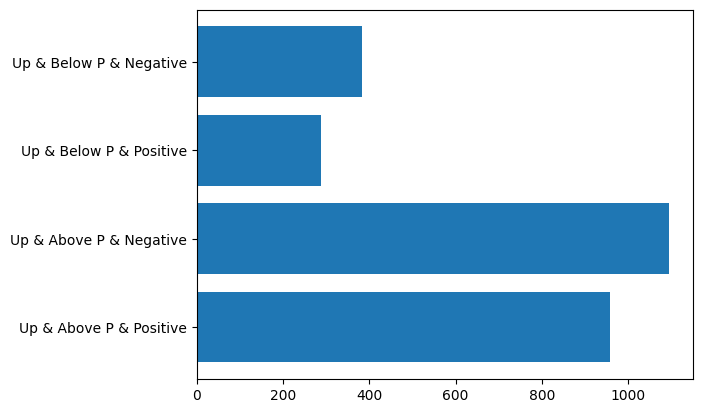

In [90]:
cross_up = has_return[has_return['cross_pivot'] == 'cross_up']
cross_up_above_p = cross_up[cross_up['Close'] > cross_up['P']]
cross_up_above_p_positive = cross_up_above_p[cross_up_above_p['return'] > 0]
cross_up_above_p_negative = cross_up_above_p[cross_up_above_p['return'] < 0]
#
cross_up_below_p = cross_up[cross_up['Close'] < cross_up['P']]
cross_up_below_p_positive = cross_up_below_p[cross_up_below_p['return'] > 0]
cross_up_below_p_negative = cross_up_below_p[cross_up_below_p['return'] < 0]
#
plt.barh(['Up & Above P & Positive', 'Up & Above P & Negative', 'Up & Below P & Positive', 'Up & Below P & Negative'], [len(cross_up_above_p_positive), len(cross_up_above_p_negative), len(cross_up_below_p_positive), len(cross_up_below_p_negative)])

<BarContainer object of 4 artists>

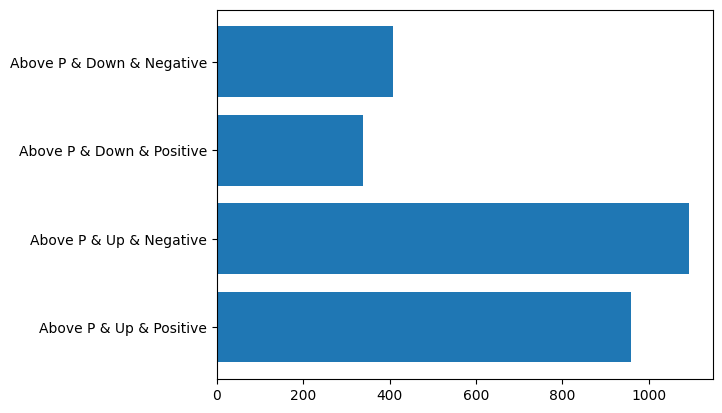

In [91]:
above_p = has_return[has_return['Close'] > has_return['P']]
above_p['rsi_x'] = above_p.apply(lambda r: '<30' if r["rsi"] < 30 else ('>30' if 30 < r['rsi'] <= 70 else '>70'), axis = 1)
above_p['first_close_position'] = above_p.apply(lambda r: 'below_s1' if r["First_Close"] < r["S1"] else ('below_p' if r["First_Close"] < r["P"] else ('above_r1' if r["First_Close"] > r["R1"] else 'above_p')), axis = 1)
above_p['cross_position'] = above_p.apply(lambda r: 'cross_p' if r["prev_Close"] < r["P"] < r["Close"] else ('cross_r1' if r["prev_Close"] < r["R1"] < r["Close"] else ('cross_r2' if r["prev_Close"] < r["R2"] < r["Close"] else 'cross_rx')), axis = 1)
above_p['step_range'] = above_p.apply(lambda r: float(r["Close"] - r["prev_Close"]), axis = 1)
above_p['step_range'] = above_p['step_range'].round(0)
above_p_cross_up_positive = above_p[(has_return['cross_pivot'] == 'cross_up') & (above_p['return'] > 0)]
above_p_cross_up_negative = above_p[(has_return['cross_pivot'] == 'cross_up') & (above_p['return'] < 0)]
above_p_cross_down_positive = above_p[(has_return['cross_pivot'] == 'cross_down') & (above_p['return'] > 0)]
above_p_cross_down_negative = above_p[(has_return['cross_pivot'] == 'cross_down') & (above_p['return'] < 0)]
#
plt.barh(['Above P & Up & Positive', 'Above P & Up & Negative', 'Above P & Down & Positive', 'Above P & Down & Negative'], [len(above_p_cross_up_positive), len(above_p_cross_up_negative), len(above_p_cross_down_positive), len(above_p_cross_down_negative)])

In [92]:
# above_p_cross_up_positive['step_range'].describe()
# k = above_p_cross_up_positive['step_range'].unique()
# k2 = above_p_cross_up_negative['step_range'].unique()
grouped_k = above_p_cross_up_positive[['step_range']].groupby([above_p_cross_up_positive.step_range]).count()
grouped_k['step_range'].sort_values()

step_range
28.0      1
16.0      1
15.0      1
13.0      1
26.0      1
18.0      2
12.0      3
11.0      7
7.0      13
10.0     13
9.0      14
8.0      14
6.0      27
5.0      39
4.0      71
3.0      91
0.0     175
2.0     209
1.0     275
Name: step_range, dtype: int64

In [93]:
grouped_k2 = above_p_cross_up_negative[['step_range']].groupby([above_p_cross_up_negative.step_range]).count()
grouped_k2['step_range'].sort_values()

step_range
33.0      1
14.0      1
19.0      1
15.0      2
18.0      3
16.0      3
13.0      4
12.0      4
11.0      7
10.0      9
9.0       9
8.0       9
7.0      18
6.0      38
5.0      42
4.0      62
3.0     106
0.0     197
2.0     247
1.0     331
Name: step_range, dtype: int64

In [94]:
grouped_i = above_p_cross_up_positive[['cross_position']].groupby([above_p_cross_up_positive.cross_position]).count()
grouped_i

,cross_position
cross_position,
cross_p,388
cross_r1,307
cross_r2,158
cross_rx,105


In [95]:
grouped_i2 = above_p_cross_up_negative[['cross_position']].groupby([above_p_cross_up_negative.cross_position]).count()
grouped_i2

,cross_position
cross_position,
cross_p,534
cross_r1,350
cross_r2,131
cross_rx,79


In [96]:
above_p_cross_up_positive['ibs'] = above_p_cross_up_positive['ibs'].round(1)
grouped_h = above_p_cross_up_positive[['ibs']].groupby([above_p_cross_up_positive.ibs]).count()
grouped_h

,ibs
ibs,
0.0,6
0.1,4
0.2,16
0.3,15
0.4,29
0.5,48
0.6,62
0.7,100
0.8,162


In [97]:
above_p_cross_up_negative['ibs'] = above_p_cross_up_negative['ibs'].round(1)
grouped_h2 = above_p_cross_up_negative[['ibs']].groupby([above_p_cross_up_negative.ibs]).count()
grouped_h2

,ibs
ibs,
0.0,7
0.1,5
0.2,15
0.3,19
0.4,39
0.5,60
0.6,77
0.7,123
0.8,175


In [98]:
grouped_g = above_p_cross_up_positive[['first_close_position']].groupby([above_p_cross_up_positive.first_close_position]).count()
grouped_g

,first_close_position
first_close_position,
above_p,433
above_r1,173
below_p,314
below_s1,38


In [99]:
grouped_g2 = above_p_cross_up_negative[['first_close_position']].groupby([above_p_cross_up_negative.first_close_position]).count()
grouped_g2

,first_close_position
first_close_position,
above_p,561
above_r1,215
below_p,290
below_s1,28


In [100]:
above_p_cross_up_positive_by_hour = above_p_cross_up_positive.resample("H").agg({
        'return': 'count'
    })
grouped_A = above_p_cross_up_positive_by_hour.groupby([above_p_cross_up_positive_by_hour.index.hour]).sum()
grouped_A[grouped_A['return'] > 0]

,return
Date,
9,220
10,158
11,84
13,233
14,263


In [101]:
above_p_cross_up_negative_by_hour = above_p_cross_up_negative.resample("H").agg({
        'return': 'count'
    }).rename(columns={'return': 'count'})
grouped_B = above_p_cross_up_negative_by_hour.groupby([above_p_cross_up_negative_by_hour.index.hour]).sum()
grouped_B[grouped_B['count'] > 0]

,count
Date,
9,293
10,213
11,113
13,288
14,187


In [102]:
above_p_cross_up_positive_by_year = above_p_cross_up_positive.resample("Y").agg({
        'return': 'count'
    }).rename(columns={'return': 'count'})
grouped_c = above_p_cross_up_positive_by_year.groupby([above_p_cross_up_positive_by_year.index.year]).sum()
grouped_c[grouped_c['count'] > 0]

,count
Date,
2018,71
2019,160
2020,164
2021,165
2022,128
2023,155
2024,115


In [103]:
above_p_cross_up_positive_by_month = above_p_cross_up_positive.resample("M").agg({
        'return': 'count'
    }).rename(columns={'return': 'count'})
grouped_d = above_p_cross_up_positive_by_month.groupby([above_p_cross_up_positive_by_month.index.month]).sum()
grouped_d[grouped_d['count'] > 0]

,count
Date,
1,75
2,98
3,63
4,86
5,104
6,76
7,57
8,80
9,77


In [104]:
grouped_e = above_p_cross_up_positive[['rsi_x']].groupby([above_p_cross_up_positive.rsi_x]).count()
grouped_e

,rsi_x
rsi_x,
>30,629
>70,329


In [105]:
grouped_f = above_p_cross_up_negative[['rsi_x']].groupby([above_p_cross_up_negative.rsi_x]).count()
grouped_f

,rsi_x
rsi_x,
<30,2
>30,868
>70,224


In [106]:
positive = has_return[has_return['return'] > 0]
positive_cross_up = positive[positive['cross_pivot'] == 'cross_up']
positive_cross_down = positive[positive['cross_pivot'] == 'cross_down']
negative = has_return[has_return['return'] < 0]
negative_cross_up = negative[negative['cross_pivot'] == 'cross_up']
negative_cross_down = negative[negative['cross_pivot'] == 'cross_down']
[len(positive), len(negative), len(positive_cross_up), len(positive_cross_down), len(negative_cross_up), len(negative_cross_down)]

[2476, 2904, 1247, 1229, 1478, 1426]

In [107]:
pcua = positive_cross_up[positive_cross_up['Close'] > positive_cross_up['P']] # Positive & cross up & above P
pcub = positive_cross_up[positive_cross_up['Close'] < positive_cross_up['P']] # Positive & cross up & below P
pcda = positive_cross_down[positive_cross_down['Close'] > positive_cross_down['P']] # Positive & cross down & above P
pcdb = positive_cross_down[positive_cross_down['Close'] < positive_cross_down['P']] # Positive & cross down & below P
[len(pcua), len(pcub), len(pcda), len(pcdb)]

[958, 288, 339, 889]

In [108]:
test = has_return[(has_return['return'] > 0) & (has_return['cross_pivot'] == 'cross_up') & (has_return['Close'] < has_return['P'])]
test

,Open,High,Low,Close,Volume,time_d,P,R1,R2,R3,...,ema_l_shift,ma_20,price_std,upper_bb,lower_bb,rsi,cross_pivot,ema_cross,ibs,return
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-16 13:35:00,938.8,941.7,938.8,941.7,2850,2018-08-16,951.833333,957.066667,967.533333,972.766667,...,939.560438,938.310,1.598651,941.507301,935.112699,58.520361,cross_up,NaN,1.000000,2.8
2018-08-16 13:50:00,940.6,942.2,940.5,942.2,1487,2018-08-16,951.833333,957.066667,967.533333,972.766667,...,939.933234,938.435,1.760465,941.955930,934.914070,58.499558,cross_up,NaN,1.000000,2.3
2018-08-29 14:05:00,962.4,963.2,962.4,963.1,1473,2018-08-29,965.866667,967.333333,969.066667,970.533333,...,964.208392,964.250,0.884070,966.018139,962.481861,39.578493,cross_up,NaN,0.875000,0.8
2018-09-18 09:25:00,947.7,948.0,947.6,948.0,1145,2018-09-18,952.033333,954.766667,959.033333,961.766667,...,951.088138,950.875,2.441931,955.758862,945.991138,30.994454,cross_up,NaN,1.000000,11.0
2018-09-18 09:55:00,947.6,948.0,947.5,948.0,643,2018-09-18,952.033333,954.766667,959.033333,961.766667,...,949.891529,949.385,2.288478,953.961956,944.808044,33.204925,cross_up,NaN,1.000000,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-29 11:25:00,1283.8,1284.3,1283.6,1284.1,2428,2024-05-29,1288.233333,1296.766667,1301.033333,1309.566667,...,1284.759869,1284.105,0.965442,1286.035885,1282.174115,46.535587,cross_up,NaN,0.714286,2.1
2024-05-29 13:05:00,1283.9,1284.9,1283.6,1284.7,2291,2024-05-29,1288.233333,1296.766667,1301.033333,1309.566667,...,1284.615869,1283.875,0.636499,1285.147999,1282.602001,50.284516,cross_up,NaN,0.846154,1.5
2024-06-11 13:35:00,1300.7,1303.0,1300.3,1302.6,6103,2024-06-11,1310.033333,1314.866667,1318.833333,1323.666667,...,1305.828869,1304.885,1.405356,1307.695713,1302.074287,34.375744,cross_up,NaN,0.851852,5.6


In [109]:
percent_1 = len(pcua) * 100 / len(positive)
percent_2 = len(pcub) * 100 / len(positive)
percent_3 = len(pcda) * 100 / len(positive)
percent_4 = 100 - (percent_1 + percent_2 + percent_3)
pie_percents = [percent_1, percent_2, percent_3, percent_4]
mylabels = ["Positive & cross up & above P", "Positive & cross up & below P", "Positive &  Cross down & above P", "Positive &  Cross down & below P"]
pie_percents

[38.69143780290791, 11.631663974151857, 13.691437802907917, 35.98546042003231]

([<matplotlib.patches.Wedge at 0x73a9c5502500>,
 [Text(0.3826268135467791, 1.0313082572902432, 'Positive & cross up & above P'),
  Text(-1.0351389320093833, 0.37213894104013523, 'Positive & cross up & below P'),
  Text(-0.9902858499717578, -0.478888228447634, 'Positive &  Cross down & above P'),
  Text(0.4688117895409751, -0.995095727047096, 'Positive &  Cross down & below P')])

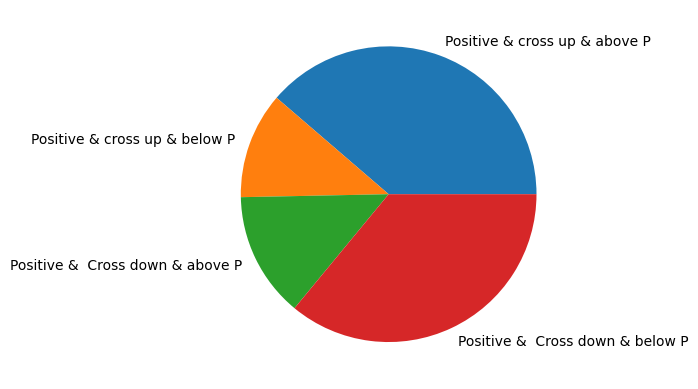

In [110]:
plt.pie(pie_percents, labels = mylabels)

In [111]:
ncua = negative_cross_up[negative_cross_up['Close'] > negative_cross_up['P']] # Negative & cross up & above P
ncub = negative_cross_up[negative_cross_up['Close'] < negative_cross_up['P']] # Negative & cross up & below P
ncda = negative_cross_down[negative_cross_down['Close'] > negative_cross_down['P']] # Negative & cross down & above P
ncdb = negative_cross_down[negative_cross_down['Close'] < negative_cross_down['P']] # Negative & cross down & below P
percent_11 = len(pcua) * 100 / len(negative)
percent_12 = len(pcub) * 100 / len(negative)
percent_13 = len(pcda) * 100 / len(negative)
percent_14 = 100 - (percent_11 + percent_12 + percent_13)
pie2_percents = [percent_11, percent_12, percent_13, percent_14]
negative_labels = ["Negative & cross up & above P", "Negative & cross up & below P", "Negative &  Cross down & above P", "Negative &  Cross down & below P"]
pie2_percents

[32.988980716253444, 9.917355371900827, 11.673553719008265, 45.42011019283747]

([<matplotlib.patches.Wedge at 0x73a9b989dc90>,
 [Text(0.5602733025978058, 0.946622325109728, 'Negative & cross up & above P'),
  Text(-0.7993847310075313, 0.7556348667392322, 'Negative & cross up & below P'),
  Text(-1.0965716149278264, 0.0867795674947684, 'Negative &  Cross down & above P'),
  Text(0.15772406294149718, -1.088633602259836, 'Negative &  Cross down & below P')])

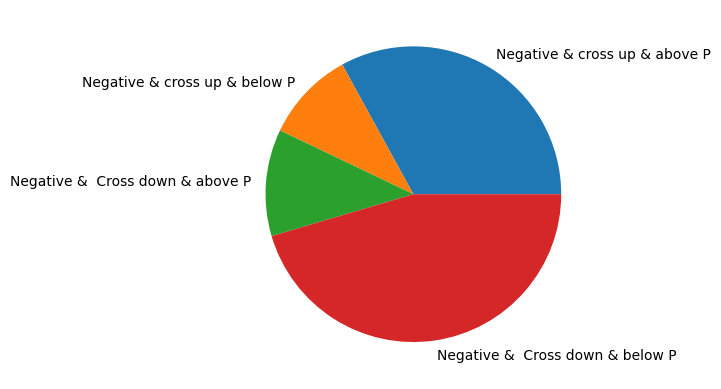

In [112]:
plt.pie(pie2_percents, labels = negative_labels)

(array([  2.,  13.,  26.,  51.,  50.,  82., 161., 171., 151., 137., 139.,
        130.,  67.,  49.,  18.]),
 array([17.        , 22.06666667, 27.13333333, 32.2       , 37.26666667,
        42.33333333, 47.4       , 52.46666667, 57.53333333, 62.6       ,
        67.66666667, 72.73333333, 77.8       , 82.86666667, 87.93333333,
        93.        ]),
 <BarContainer object of 15 artists>)

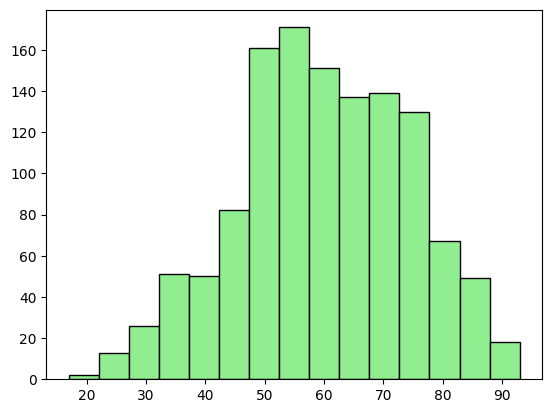

In [113]:
positive_cross_up['rsi'] = positive_cross_up['rsi'].round()
plt.hist(positive_cross_up['rsi'], color='lightgreen', ec='black', bins=15)

(array([  7.,  20.,  40.,  58.,  86., 137., 238., 230., 184., 174., 130.,
        101.,  49.,  16.,   8.]),
 array([18.        , 22.93333333, 27.86666667, 32.8       , 37.73333333,
        42.66666667, 47.6       , 52.53333333, 57.46666667, 62.4       ,
        67.33333333, 72.26666667, 77.2       , 82.13333333, 87.06666667,
        92.        ]),
 <BarContainer object of 15 artists>)

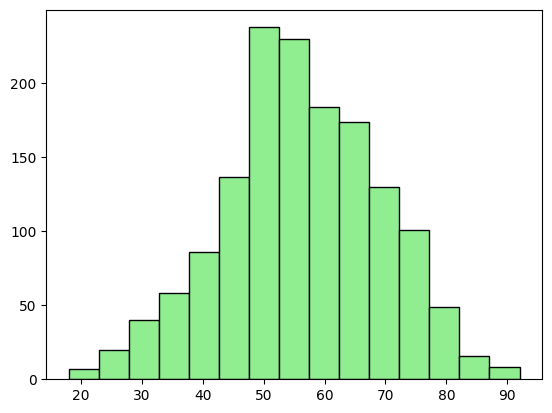

In [114]:
negative_cross_up['rsi'] = negative_cross_up['rsi'].round()
plt.hist(negative_cross_up['rsi'], color='lightgreen', ec='black', bins=15)

In [115]:
# Ket luan RSI not good

## R1-P or P-S1 to big(or high)

In [116]:
big_pivot_range = data[(data['R1'] > data['P'] + 9) | (data['P'] > data['S1'] + 9)]
big_pivot_range

,Open,High,Low,Close,Volume,time_d,P,R1,R2,R3,...,ema_l,ema_l_shift,ma_20,price_std,upper_bb,lower_bb,rsi,cross_pivot,ema_cross,ibs
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-16 09:00:00,942.4,942.4,941.0,942.0,1666,2018-08-16,951.833333,957.066667,967.533333,972.766667,...,954.158141,955.130792,954.330,4.266405,962.862810,945.797190,17.896244,NaN,NaN,0.714286
2018-08-16 09:05:00,942.0,942.1,941.0,941.8,1002,2018-08-16,951.833333,957.066667,967.533333,972.766667,...,953.242723,954.158141,953.660,5.094414,963.848828,943.471172,17.711014,NaN,NaN,0.727273
2018-08-16 09:10:00,942.0,942.0,941.0,941.0,967,2018-08-16,951.833333,957.066667,967.533333,972.766667,...,952.335855,953.242723,952.915,5.791398,964.497796,941.332204,16.955064,cross_down,NaN,0.000000
2018-08-16 09:15:00,941.3,942.1,941.0,942.1,1523,2018-08-16,951.833333,957.066667,967.533333,972.766667,...,951.577643,952.335855,952.225,6.223037,964.671073,939.778927,21.891733,cross_up,NaN,1.000000
2018-08-16 09:20:00,942.1,942.5,941.7,942.5,1056,2018-08-16,951.833333,957.066667,967.533333,972.766667,...,950.905225,951.577643,951.515,6.489934,964.494867,938.535133,23.668684,NaN,NaN,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-19 14:15:00,1320.6,1325.0,1319.0,1322.7,15368,2024-06-19,1313.133333,1317.766667,1327.033333,1331.666667,...,1308.514204,1307.379340,1307.045,6.221142,1319.487284,1294.602716,83.705062,NaN,NaN,0.616667
2024-06-19 14:20:00,1322.6,1323.0,1317.0,1317.0,12067,2024-06-19,1313.133333,1317.766667,1327.033333,1331.666667,...,1309.142781,1308.514204,1307.845,6.428184,1320.701368,1294.988632,65.957350,cross_down,NaN,0.000000
2024-06-19 14:25:00,1317.3,1318.0,1314.3,1314.5,11350,2024-06-19,1313.133333,1317.766667,1327.033333,1331.666667,...,1309.539612,1309.142781,1308.525,6.373950,1321.272900,1295.777100,59.953184,NaN,NaN,0.054054


## Today data

In [119]:
selected_date_data = same_color[(same_color.index > '2024-06-19 00:00:00') & (same_color.index < '2024-06-19 15:00:00')]

In [120]:
selected_date_entry_data = selected_date_data[selected_date_data['return'] != '']
selected_date_entry_data

,Open,High,Low,Close,Volume,time_d,P,R1,R2,R3,...,ema_l_shift,ma_20,price_std,upper_bb,lower_bb,rsi,cross_pivot,ema_cross,ibs,return
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-19 10:00:00,1306.7,1306.7,1299.3,1300.7,17674,2024-06-19,1313.133333,1317.766667,1327.033333,1331.666667,...,1311.579270,1310.425,3.576219,1317.577438,1303.272562,21.613517,cross_down,NaN,0.189189,-3.5
2024-06-19 13:15:00,1303.1,1305.4,1302.8,1304.9,8311,2024-06-19,1313.133333,1317.766667,1327.033333,1331.666667,...,1303.705165,1302.045,1.101900,1304.248801,1299.841199,54.930656,cross_up,NaN,0.807692,12.1
2024-06-19 14:05:00,1309.6,1316.7,1309.6,1316.7,14553,2024-06-19,1313.133333,1317.766667,1327.033333,1331.666667,...,1305.508702,1304.970,3.998829,1312.967658,1296.972342,78.232079,cross_up,NaN,1.000000,0.3
2024-06-19 14:10:00,1316.7,1321.3,1314.9,1320.4,17070,2024-06-19,1313.133333,1317.766667,1327.033333,1331.666667,...,1306.337687,1305.955,5.151747,1316.258495,1295.651505,81.877998,cross_up,NaN,0.859375,-3.4
2024-06-19 14:20:00,1322.6,1323.0,1317.0,1317.0,12067,2024-06-19,1313.133333,1317.766667,1327.033333,1331.666667,...,1308.514204,1307.845,6.428184,1320.701368,1294.988632,65.957350,cross_down,NaN,0.000000,2.5
